<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')
sns.set_palette("PuBuGn_d")


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

#### Loading the data

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Cleaning the data 

In [7]:
# convert mssubclass into object, not int
house['MSSubClass'] = house['MSSubClass'].astype('object')

In [8]:
# looking into type of properties
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
# remove all commercial properties, only to keep residential
house = house[(house['MSZoning'] != 'C (all)')]

In [10]:
# checking
house['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [11]:
# checking for null values
# to view the top 5 columns that have null values

missing = house.isnull().sum().sort_values(ascending=False)
percentage = ((house.isnull().sum()/house.isnull().count())*100).sort_values(ascending=False)

missing_data = pd.concat([missing,percentage],axis=1,keys=['Total','%_null'])
missing_data[missing_data['Total']>0].head()

,Total,%_null
PoolQC,1443,99.517241
MiscFeature,1398,96.413793
Alley,1361,93.862069
Fence,1172,80.827586
FireplaceQu,681,46.965517


In [12]:
# to drop columns that have >1000 null values
house.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [13]:
house.shape

(1450, 77)

In [14]:
# to drop fixed features that are deemed to be 'renovate-able'

# create a list of the features to drop
drop_col = ['Street','Utilities','Condition2','RoofStyle','RoofMatl','Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType2','Heating','SaleType', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'SaleCondition' ]
renovation = house[drop_col].copy() # to use in q2

# drop the features from the drop list
house.drop(drop_col, axis=1, inplace=True)

In [15]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'MasVnrArea', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
house.shape

(1450, 56)

In [17]:
# id column not needed for analysis, to drop
house.drop('Id', axis=1, inplace=True)

#### Dealing with null values

In [18]:
# check total number of null values
house.isnull().sum().sum()

1223

In [19]:
# check which columns have null values
house.columns[house.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinType1', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish'],
      dtype='object')

In [20]:
# To fill numerical missing data with the median value
house['MasVnrArea']=house['MasVnrArea'].fillna(0)
house['LotFrontage']=house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [21]:
# Assume garage built the same year as original construction date
# Fill GarageYrBlt with YearBuild
house['GarageYrBlt'].fillna(house['YearBuilt'], inplace=True)

In [22]:
# To fill categorical missing data with none
missing_cat = ['GarageType', 'GarageFinish','BsmtFinType1','Electrical','FireplaceQu']

house[missing_cat]=house[missing_cat].fillna('None')

In [23]:
# checking for null values
house.isnull().sum().sum()

0

#### Perform some feature engineering

In [24]:
# create a column for total sqft
house['total_sqft'] = house['TotalBsmtSF'] + house['GarageArea'] + house['GrLivArea'] + house['1stFlrSF']

#### Looking into target variable (SalePrice)

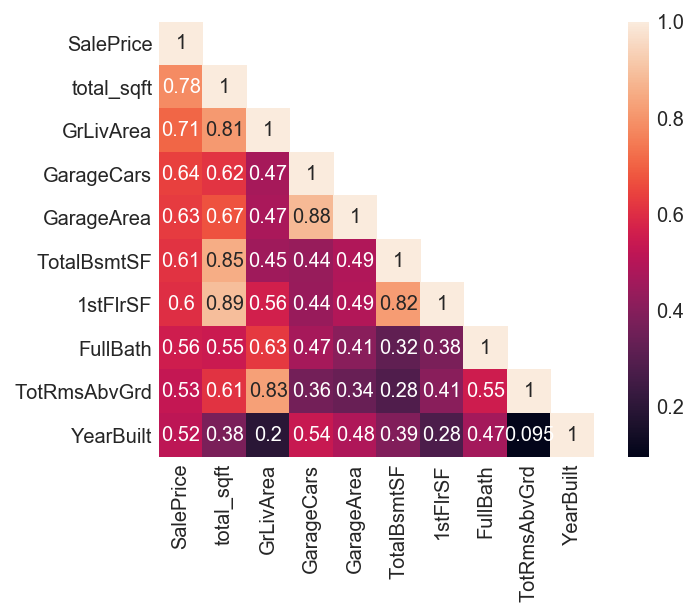

In [25]:
corrmat=house.corr()
cols=corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm=np.corrcoef(house[cols].values.T)
mask=np.array(cm)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(cm,cbar=True,mask=mask,annot=True,square=True,yticklabels=cols.values, xticklabels=cols.values)
plt.show()

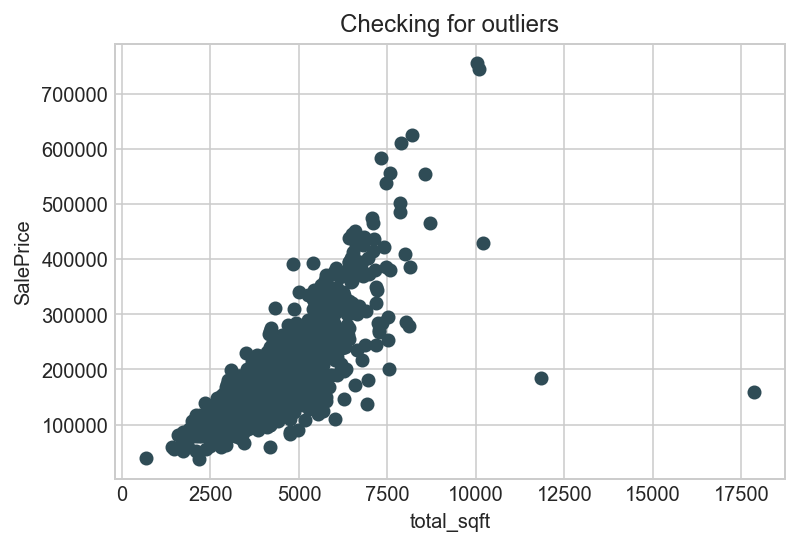

In [26]:
# take a look at total_sqft, which has the highest linear correlation to sales price

plt.scatter(house['total_sqft'], house['SalePrice'])
plt.title("Checking for outliers")
plt.xlabel("total_sqft")
plt.ylabel("SalePrice")
plt.show()

In [27]:
outliers = house[house["total_sqft"] >10000]
outliers # to use in q2

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,total_sqft
496,20,RL,91.0,12692,IR1,Lvl,Inside,Gtl,NoRidge,Norm,...,75,291,0,0,0,0,5,2007,430000,10202
523,60,RL,130.0,40094,IR1,Bnk,Inside,Gtl,Edwards,PosN,...,406,0,0,0,0,0,10,2007,184750,11836
691,60,RL,104.0,21535,IR1,Lvl,Corner,Gtl,NoRidge,Norm,...,50,0,0,0,0,0,1,2007,755000,10036
1182,60,RL,160.0,15623,IR1,Lvl,Corner,Gtl,NoRidge,Norm,...,78,0,0,0,555,0,7,2007,745000,10096
1298,60,RL,313.0,63887,IR3,Bnk,Corner,Gtl,Edwards,Feedr,...,292,0,0,0,480,0,1,2008,160000,17862


In [28]:
# seems that there are some outliers (>10000), to remove them

house = house[house["total_sqft"] <10000]

In [29]:
# take a look at target variable
house['SalePrice'].describe()

count      1445.000000
mean     180709.284429
std       76152.869678
min       37900.000000
25%      130000.000000
50%      163500.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'Original saleprice')

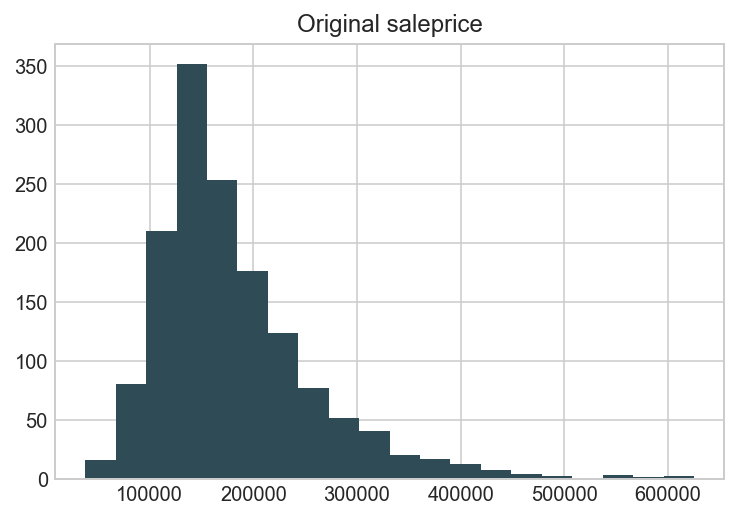

In [30]:
plt.hist(house["SalePrice"], bins =20)
plt.title('Original saleprice')

# we can see that the distribution is positively skewed

Text(0.5,1,'Log transformed saleprice')

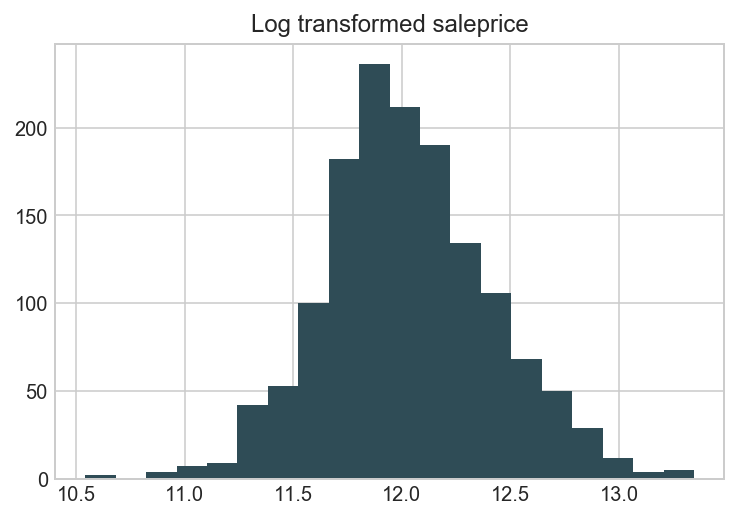

In [31]:
# log it 
plt.hist(np.log1p(house['SalePrice']), bins=20)
plt.title('Log transformed saleprice')

#### Checking for variables with strong linear correlations after dropping outliers

In [32]:
# get numerical features
num_features=house.columns[house.dtypes!=object]
num_features=num_features[1:-2] 
labels = []
values = []
for col in num_features:
    labels.append(col)
    values.append(np.corrcoef(house[col].values, house['SalePrice'].values)[0,1])

Text(0.5,1,'Correlations with Sale Price')

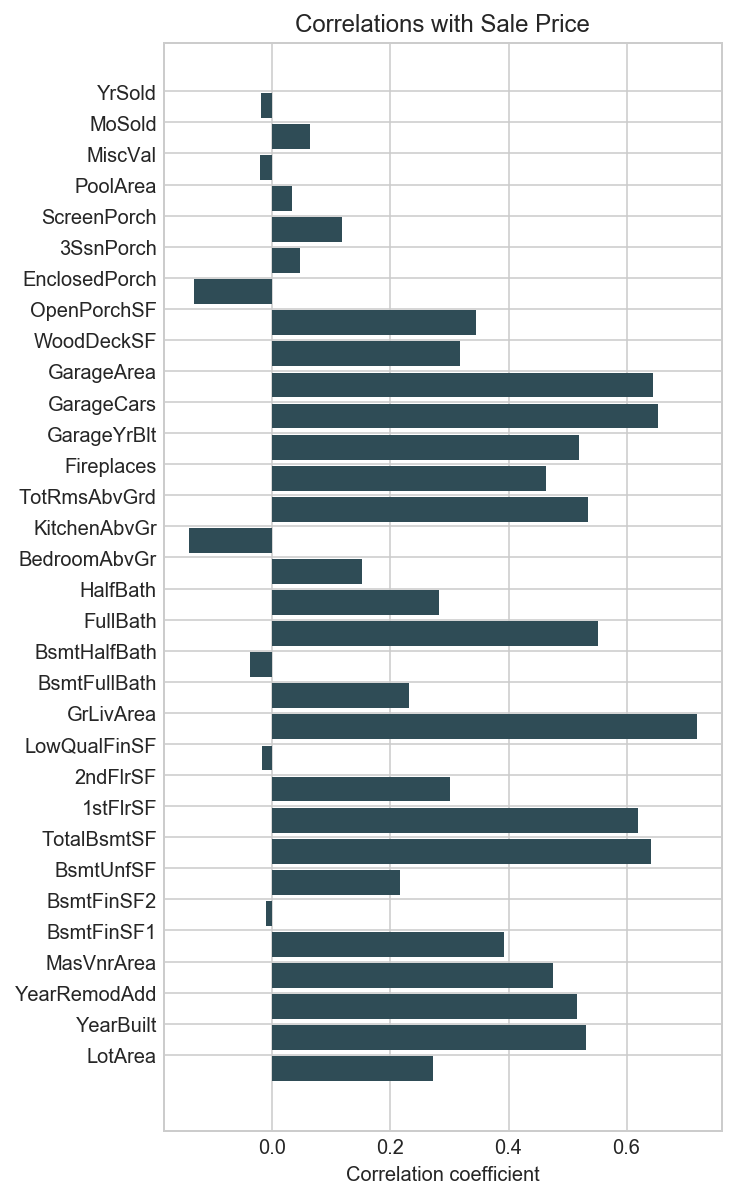

In [33]:
# plot it
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, np.array(values))
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlations with Sale Price")

#### Getting the fixed features, top 10 (based on linear correlation)

In [34]:
# select top 10 numeric features
fixed_features = cols[0:10].tolist()
fixed_features

['SalePrice',
 'total_sqft',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

#### Splitting the dataset

In [35]:
# getting the dataset with fixed features for modelling

# creating dummies
dums = pd.get_dummies(house[fixed_features], dummy_na=True, drop_first=True)

# combine dummies with top 10 numeric
df_dums = pd.concat([house[num_features], dums], axis=1)
df_dums.shape

(1445, 42)

In [36]:
# split data to train and test, pre/post 2010

test = df_dums[df_dums['YrSold'] == 2010]
train = df_dums[df_dums['YrSold'] < 2010]

print(train.shape, test.shape)

X_train = train.iloc[:, train.columns != 'SalePrice'] 
y_train = train['SalePrice']
X_test = test.iloc[:, test.columns != 'SalePrice']
y_test = test['SalePrice']

(1273, 42) (172, 42)


In [37]:
X_train.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'total_sqft', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt'],
      dtype='object')

In [38]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm

In [39]:
# scale data
ss = StandardScaler()
ss.fit(X_train)

# Transform train and test
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

# linear model 

lm = LinearRegression()
model = lm.fit(Xs_train, y_train)

print(model.score(Xs_train, y_train))

0.8336988562765089


In [40]:
scores = cross_val_score(lm, Xs_train, y_train, cv = 10)
print(scores)
print(scores.mean(), scores.std())

[0.81227551 0.81795194 0.83427549 0.87201925 0.83385493 0.80783013
 0.81677275 0.7716989  0.77253236 0.80871758]
0.8147928832452289 0.027868368125113847


In [41]:
# test model

predicted = model.predict(Xs_test)
print(model.score(Xs_test, y_test))
print(metrics.mean_squared_error(y_test, predicted))

0.8466540603155939
974881339.2753026


In [42]:
# using OLS
X_train_OLS = sm.add_constant(Xs_train)
X_test_OLS = sm.add_constant(Xs_test, has_constant='add')


model = sm.OLS(y_train,X_train_OLS)

model = model.fit()
predictions_OLS = model.predict(X_test_OLS)

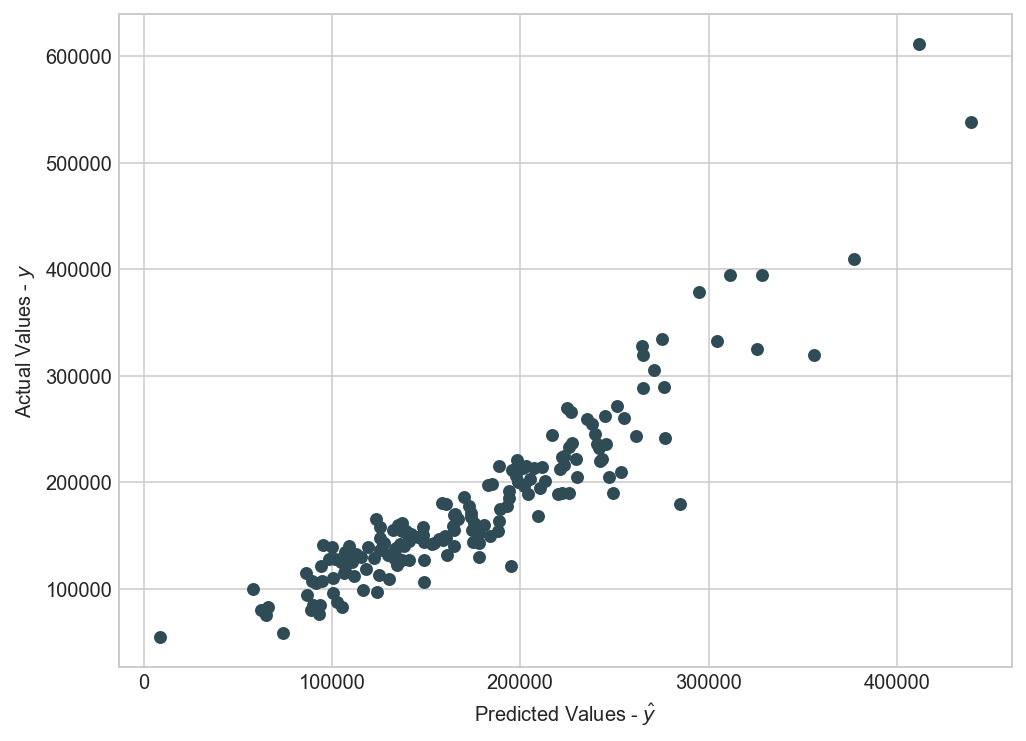

In [43]:
# plot it
plt.figure(figsize=(8,6))
plt.scatter(predictions_OLS, y_test, s=30, zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [44]:
model.summary(xname = ['const'] + X_train.columns.tolist())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        02:55:11   Log-Likelihood:                -14965.
No. Observations:                1273   AIC:                         2.999e+04
Df Residuals:                    1242   BIC:                         3.015e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.809e+05    875.064    206.748      0.000    1.79e+05    1.83e+05
LotArea        4799.7796    950.301      5.051      0.000    2935.407    6664.152
YearBuilt      6090.5772   1010.783      6.026      0.000    4107.547    8073.608
YearRemodAdd   1.026e+04   1217.460      8.426      0.000    7870.418    1.26e+04
MasVnrArea     6061.6094   1017.052      5.960      0.000    4066.279    8056.940
BsmtFinSF1     6784.1368    839.793      8.078      0.000    5136.567    8431.707
BsmtFinSF2    -1405.7006    874.790     -1.607      0.108   -3121.929     310.528
BsmtUnfSF      -694.4538    711.720     -0.976      0.329   -2090.759     701.852
TotalBsmtSF    5846.6990    670.967      8.714      0.000    4530.344    7163.054
1stFlrSF       2155.2968    691.185      3.118      0.002     799.278    3511.315
2ndFlrSF       9349.8325    873.950     10.698      0.000    7635.251    1.11e+04
LowQualFinSF  -1006.2619    923.181     -1.090      0.276   -2817.428     804.904
GrLivArea      9674.5992    708.990     13.646      0.000    8283.648    1.11e+04
BsmtFullBath    229.5398   1305.484      0.176      0.860   -2331.659    2790.738
BsmtHalfBath  -1297.3914    936.871     -1.385      0.166   -3135.416     540.633
FullBath        -36.5066    737.004     -0.050      0.961   -1482.418    1409.405
HalfBath      -1919.7605   1306.591     -1.469      0.142   -4483.130     643.609
BedroomAbvGr  -1.101e+04   1305.370     -8.436      0.000   -1.36e+04   -8450.741
KitchenAbvGr  -8137.2304   1007.568     -8.076      0.000   -1.01e+04   -6160.508
TotRmsAbvGrd   4830.2156    960.062      5.031      0.000    2946.692    6713.739
Fireplaces     3303.2157   1090.604      3.029      0.003    1163.587    5442.845
GarageYrBlt   -2984.6925   1955.104     -1.527      0.127   -6820.364     850.979
GarageCars     1922.0235   1024.080      1.877      0.061     -87.094    3931.141
GarageArea     2708.4442   1020.253      2.655      0.008     706.834    4710.055
WoodDeckSF     1928.7547    968.747      1.991      0.047      28.193    3829.316
OpenPorchSF    2729.9085    966.807      2.824      0.005     833.152    4626.665
EnclosedPorch   878.7350    982.061      0.895      0.371   -1047.946    2805.416
3SsnPorch       642.6367    886.215      0.725      0.468   -1096.008    2381.281
ScreenPorch    2477.7010    933.092      2.655      0.008     647.090    4308.312
PoolArea        150.6881    895.666      0.168      0.866   -1606.497    1907.873
MiscVal        -726.0363    883.020     -0.822      0.411   -2458.412    1006.339
MoSold         1362.2075    886.685      1.536      0.125    -377.359    3101.774
YrSold         -750.6061    886.766     -0.846      0.397   -2490.331     989.119
total_sqft     7151.9455    337.255     21.206      0.000    6490.292    7813.599
GrLivArea      9674.5992    708.990     13.646   

##### Findings

R2> 0.8, the model quite good 
With a p value>0.05, the model indicates that these features are not statistically significant , can be removed from model.
 

In [45]:
# create a list of these features
# to_exclude = ['BsmtFinSF2', BsmtUnfSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, GarageYrBlt, GarageCars, EnclosedPorch, 3SsnPorch, PoolArea, MiscVal, MoSold, YrSold,

#### Perform linear regression

In [46]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
# build linear regression, lasso regression and ridge regression to compare the r2 values

Score: 0.8467171330891871
RMSE: 31216.66799133257
[ 4.75698721e+03 -6.05791453e+16  1.02561036e+04  6.05562238e+03
 -1.10155511e+16 -3.99886848e+15 -1.14224288e+16  2.01261915e+16
  3.10916259e+16  1.54974016e+16  1.75240116e+15 -9.19640891e+13
  2.25318506e+02 -1.29808807e+03  2.53295634e+15 -1.92686907e+03
 -1.10083058e+04 -8.14829716e+03 -1.86599521e+16  3.31067135e+03
 -2.97097161e+03 -1.20879374e+14  1.73155395e+15  1.93558227e+03
  2.74066716e+03  8.67142563e+02  6.43913473e+02  2.48985262e+03
  1.51777302e+02 -7.26082635e+02  1.36218816e+03 -7.50020825e+02
 -1.17993636e+16 -1.27177161e+16  1.20879374e+14  3.84177756e+14
 -5.62018921e+15 -1.44734662e+16 -2.53295634e+15  1.86599521e+16
  6.05791453e+16]
180922.94236735342


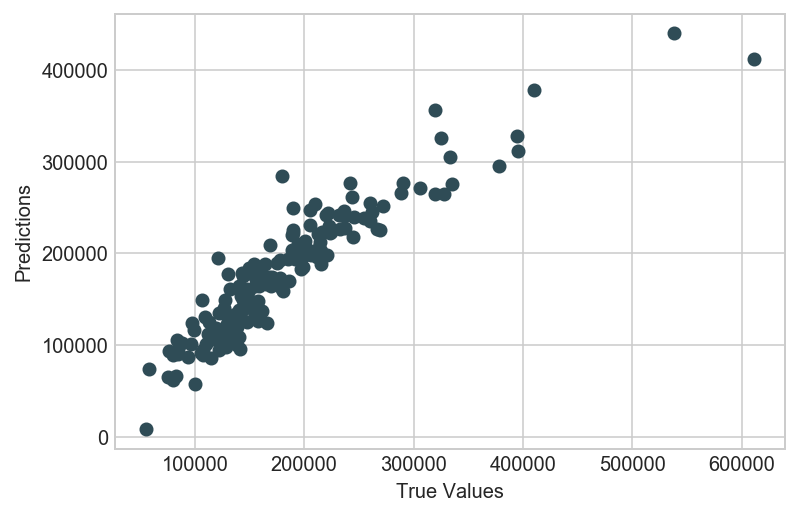

In [48]:
lm = LinearRegression(normalize=True)

model = lm.fit(Xs_train, y_train)
predictions = lm.predict(Xs_test)

lm_scores = cross_val_score(model, Xs_test, y_test, cv=10)

print("Score:", model.score(Xs_test, y_test))

# calculate RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# examine the coefficients
print(lm.coef_)
print(lm.intercept_)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

#### Trying with Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(Xs_train, y_train)
y_pred = lassoreg.predict(Xs_test)

print("Score: ",lassoreg.score(Xs_test, y_test))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score:  0.846652524432554
RMSE :  31223.246203698316


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### Trying with Ridge

In [50]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(Xs_train, y_train)
y_pred = ridgereg.predict(Xs_test)
print("Score:", ridgereg.score(Xs_test, y_test))
print("RMSE alpha=0: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score: 0.8469653457851536
RMSE alpha=0:  31191.382997722245


### Findings

Summary of scores:

    Linear: 0.8467171330891871
    
    Lasso: 0.846652524432554
    
    Ridge: 0.8469653457851536
        
Using the ridge model gave the best R2 score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [51]:
#Get residuals
train_resid = y_train - lm.predict(X_train)
test_resid = y_test - predictions

lm_residuals = train_resid
lm_residuals = lm_residuals.append(test_resid)
lm_residuals.shape

(1445,)

In [52]:
# add to df
house["lm_residuals"] = lm_residuals

In [53]:
lm_residuals.isnull().any()

False

In [54]:
# take a look at the features that were pulled out previously
renovation.head()

,Street,Utilities,Condition2,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,BsmtExposure,BsmtFinType2,Heating,...,OverallQual,OverallCond,ExterQual,ExterCond,KitchenQual,GarageQual,GarageCond,BsmtQual,BsmtCond,SaleCondition
0,Pave,AllPub,Norm,Gable,CompShg,VinylSd,BrkFace,No,Unf,GasA,...,7,5,Gd,TA,Gd,TA,TA,Gd,TA,Normal
1,Pave,AllPub,Norm,Gable,CompShg,MetalSd,None,Gd,Unf,GasA,...,6,8,TA,TA,TA,TA,TA,Gd,TA,Normal
2,Pave,AllPub,Norm,Gable,CompShg,VinylSd,BrkFace,Mn,Unf,GasA,...,7,5,Gd,TA,Gd,TA,TA,Gd,TA,Normal
3,Pave,AllPub,Norm,Gable,CompShg,Wd Shng,None,No,Unf,GasA,...,7,5,TA,TA,Gd,TA,TA,TA,Gd,Abnorml
4,Pave,AllPub,Norm,Gable,CompShg,VinylSd,BrkFace,Av,Unf,GasA,...,8,5,Gd,TA,Gd,TA,TA,Gd,TA,Normal


In [55]:
renovation.dtypes

Street           object
Utilities        object
Condition2       object
RoofStyle        object
RoofMatl         object
Exterior2nd      object
MasVnrType       object
BsmtExposure     object
BsmtFinType2     object
Heating          object
SaleType         object
OverallQual       int64
OverallCond       int64
ExterQual        object
ExterCond        object
KitchenQual      object
GarageQual       object
GarageCond       object
BsmtQual         object
BsmtCond         object
SaleCondition    object
dtype: object

In [56]:
renovation.columns

Index(['Street', 'Utilities', 'Condition2', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'MasVnrType', 'BsmtExposure', 'BsmtFinType2', 'Heating',
       'SaleType', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
       'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
       'SaleCondition'],
      dtype='object')

In [57]:
# to pull out 'quality' features that are deemed to impact saleprice
change_features = ['OverallQual', 'OverallCond','ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageQual', 'GarageCond']
reno = renovation[change_features]

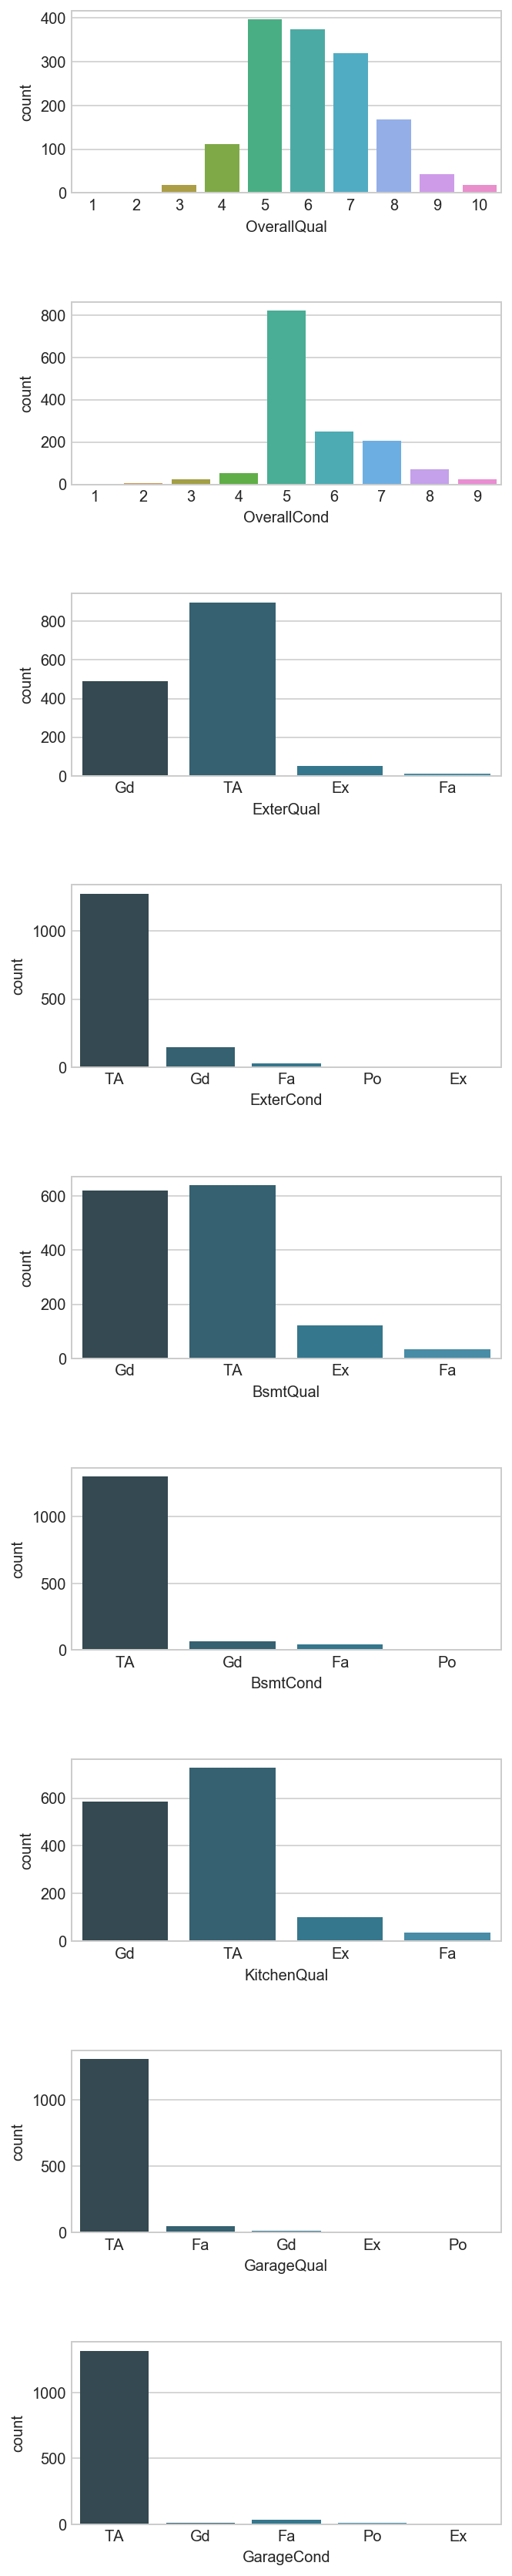

In [58]:
# taking a look at the distribution of the features
fig, axs = plt.subplots(9,1, figsize=(5, 30))
plt.subplots_adjust(hspace= .6)

for i in range(0,len(change_features)):
    sns.countplot(reno[change_features[i]], ax=axs[i])


In [59]:
# noted that qual are mostly on the same scale

In [60]:
# create dictionary
ratings = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

In [61]:
# writing a function to convert them to a numeric scale
def get_values(col):
    try: 
        return ratings[col]
    except:
        return 0

In [62]:
to_convert = ['ExterCond', 'ExterQual', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond']
for col in to_convert:
    reno[col] = reno[col].apply(get_values)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
reno.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,KitchenQual,GarageQual,GarageCond
0,7,5,4,3,4,3,4,3,3
1,6,8,3,3,4,3,3,3,3
2,7,5,4,3,4,3,4,3,3
3,7,5,3,3,3,4,4,3,3
4,8,5,4,3,4,3,4,3,3


In [64]:
# checking for null values
reno.isnull().sum().sum()

0

#### Setting up dataset for modelling

In [65]:
# split
X1 = reno
y1 = house.lm_residuals

In [66]:
print(X1.shape)
print(y1.shape)

(1450, 9)
(1445,)


In [67]:
# to remove outliers that we removed in q1
outliers.index

Int64Index([496, 523, 691, 1182, 1298], dtype='int64')

In [68]:
reno = reno.drop([496, 523, 691, 1182, 1298], inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
# scale data
ss = StandardScaler()
X1s = ss.fit_transform(X1)

In [70]:
print(X1.shape)
print(y1.shape)

(1445, 9)
(1445,)


#### Using gridsearch to find best params


In [71]:
#Prepare a range of alpha values to test
alphas = np.logspace(-10,10,21)

#Create a dictionary with the gridsearch parameters
params = {'alpha': alphas}

#Create and Fit a Ridge Regression Model, Testing Each Alpha
model = Ridge( )
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(X1s,y1)

print("Grid:\n", grid)
print 
#Summarize the Results of the Grid Search
print("Best score:\n", grid.best_score_)
print("Best estimator alpha: \n", grid.best_estimator_.alpha)

Grid:
 GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Best score:
 0.17464157843806646
Best estimator alpha: 
 100.0


In [72]:
#Ridge using best estimator:

ridge = Ridge(alpha=100)

ridge_scores = cross_val_score(ridge, X1s, y1, cv=5)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.17483464 0.22811019 0.15405409 0.15718644 0.14787386]
0.17241184637038923


In [73]:
ridge.fit(X1s, y1)

ridge_coefs = pd.DataFrame({'variable':X1.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,variable,coef,abs_coef
0,OverallQual,4.576029e+18,4.576029e+18
1,OverallCond,-1.294158e+18,1.294158e+18
4,BsmtQual,8.514192e+17,8.514192e+17
7,GarageQual,8.503177e+17,8.503177e+17
6,KitchenQual,7.713194e+17,7.713194e+17
2,ExterQual,7.054723e+17,7.054723e+17
3,ExterCond,3.774674e+17,3.774674e+17
8,GarageCond,7.568483e+16,7.568483e+16
5,BsmtCond,1.252174e+16,1.252174e+16


## Findings

Top feature influencing saleprice is the overquality. 

We see that the specific parts of the house that next best influence saleprice are the basement, garage and kitchen.

Recommend that the company should focus on renovating these parts of the house, so as to increase the saleprice.

Perhaps a strategy will be to buy the house with low quality scores of these features and proceed to fix up these features to increase the 'value' of the house.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [74]:
# A: